# Task

- Explore and prepare the dataset
- Train a machine learning model
- Evaluate model and present findings


# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency

# Data loading

In [2]:
df = pd.read_csv('customer_booking.csv', encoding='latin-1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
# copy data
df_copy=df.copy()

# Eksploratory data analysis

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
# menghitung data yang terduplikasi
duplicate = df.duplicated().sum()
duplicate

719

In [7]:
# handling duplikat
df = df.drop_duplicates()


In [8]:
df.shape

(49281, 14)

In [9]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


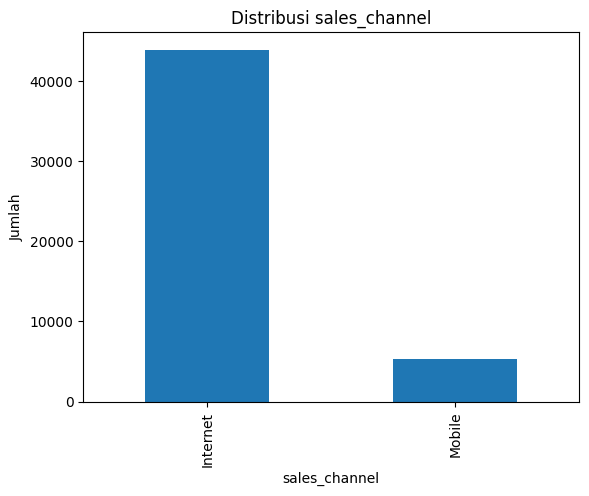

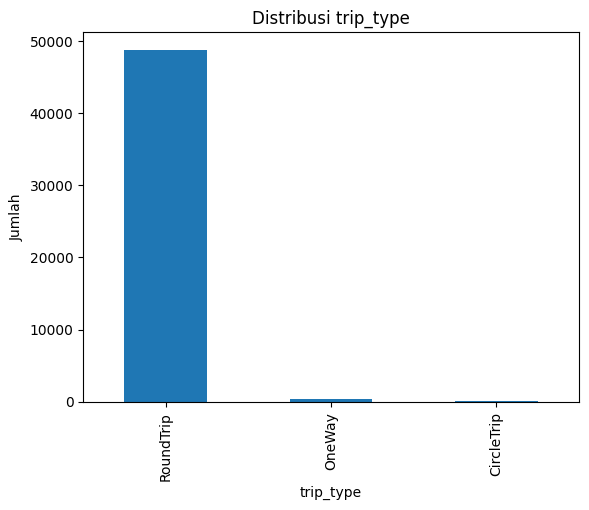

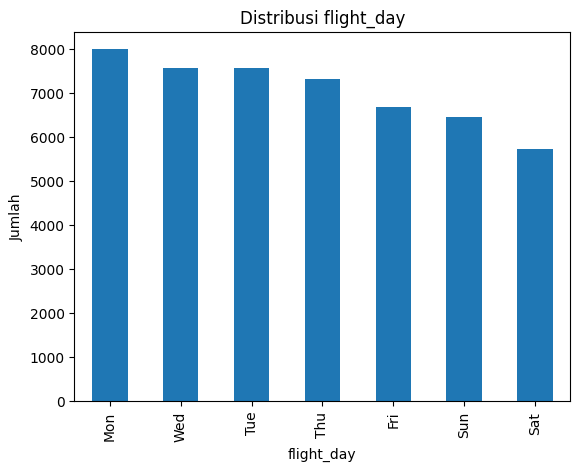

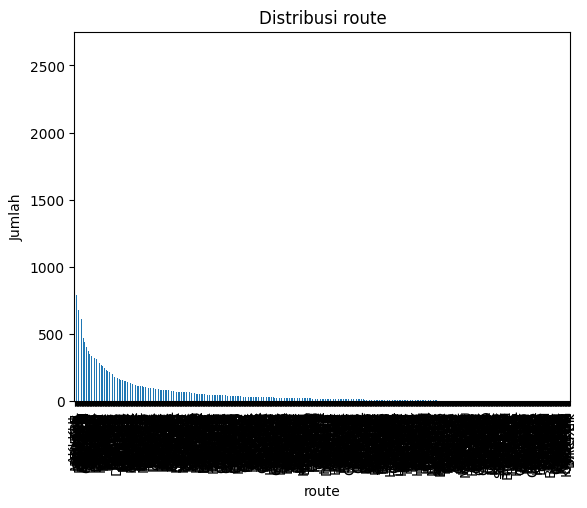

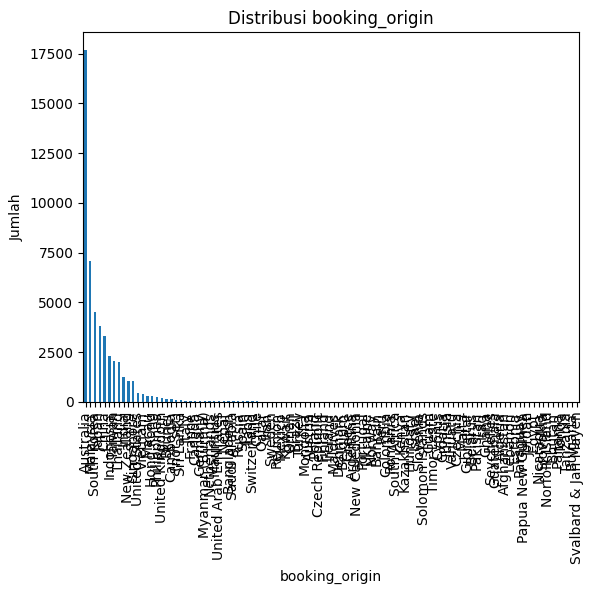

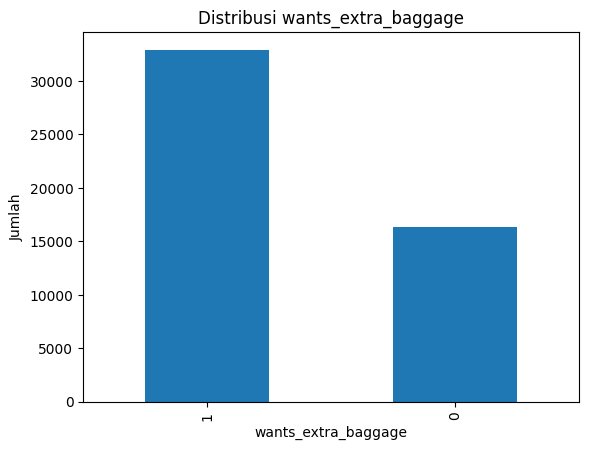

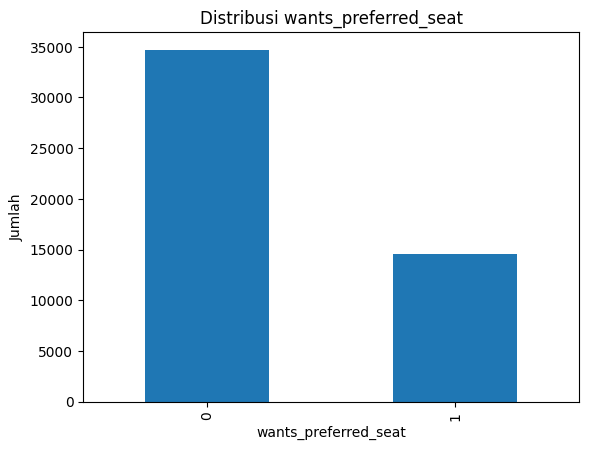

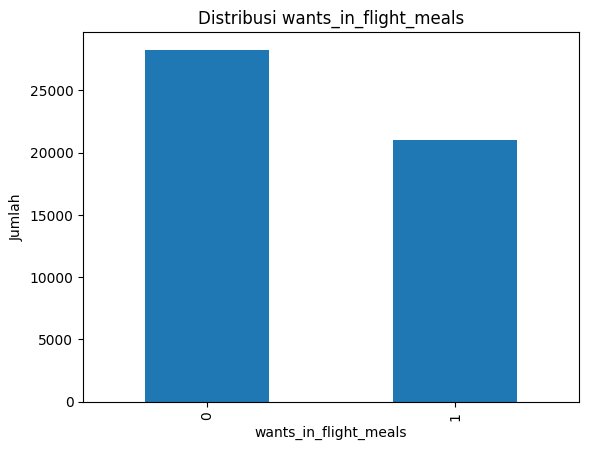

In [10]:
# cek jumlah kategori dan visualisasi distribusi
# Kolom-kolom kategorikal
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
# Visualisasi distribusi
for column in categorical_columns:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    plt.show()

# Pemeriksaan jumlah kategori
#for column in categorical_columns:
    #print(df[column].value_counts())
    #print()

In [11]:
# Pemeriksaan jumlah kategori
categorical_columns1 = ['sales_channel', 'trip_type', 'flight_day']
for column in categorical_columns1:
    print(df[column].value_counts())
    print()

sales_channel
Internet    43917
Mobile       5364
Name: count, dtype: int64

trip_type
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: count, dtype: int64

flight_day
Mon    7988
Wed    7562
Tue    7558
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: count, dtype: int64



In [12]:
# Pemeriksaan jumlah kategori
categorical_columns2 = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
for column in categorical_columns2:
    print(df[column].value_counts())
    print()

wants_extra_baggage
1    32931
0    16350
Name: count, dtype: int64

wants_preferred_seat
0    34712
1    14569
Name: count, dtype: int64

wants_in_flight_meals
0    28256
1    21025
Name: count, dtype: int64



In [13]:
# Pemeriksaan jumlah kategori
categorical_columns3 = ['route', 'booking_origin']
for column in categorical_columns3:
    print(df[column].value_counts())
    print()

route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64



In [14]:
# Cek korelasi fitur kategori dengan target
# Uji chi-square
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
results = []

for column in categorical_columns:
    crosstab = pd.crosstab(df[column], df['booking_complete'])
    chi2, p_value, dof, expected = chi2_contingency(crosstab)
    
    results.append({
        'Feature': column,
        'Chi-Square': chi2,
        'P-Value': p_value,
        'Degrees of Freedom': dof
    })

results_df = pd.DataFrame(results)
results_df

,Feature,Chi-Square,P-Value,Degrees of Freedom
0,sales_channel,75.836583,3.081390e-18,1
1,trip_type,39.975974,2.086064e-09,2
2,flight_day,14.541338,2.414031e-02,6
3,route,5820.116969,0.000000e+00,798
4,booking_origin,4642.578914,0.000000e+00,103
5,wants_extra_baggage,230.506800,4.621879e-52,1
6,wants_preferred_seat,123.829959,9.178129e-29,1
7,wants_in_flight_meals,34.194911,4.985918e-09,1


Dalam analisis uji chi-square, hubungan yang signifikan antara dua fitur kategori ditunjukkan oleh nilai p-value yang sangat kecil (mendekati nol). Semakin kecil nilai p-value, semakin signifikan hubungan tersebut. Dengan demikian, kita perlu fokus pada fitur-fitur yang memiliki p-value yang sangat kecil.

Berdasarkah hasil diatas dapat disimpulkan bahwa semua fitur-fitur tsb  memiliki hubungan yang signifikan dengan variabel target booking_complete.

In [15]:
df.head(1)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0


In [16]:
numeric_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

# Menghitung korelasi antara variabel numerik dengan variabel target
correlation_results = df[numeric_columns + ['booking_complete']].corr()['booking_complete'].drop('booking_complete')

# Membuat DataFrame
correlation_df = pd.DataFrame({'Feature': correlation_results.index, 'Correlation with booking_complete': correlation_results.values})
correlation_df

,Feature,Correlation with booking_complete
0,num_passengers,0.024092
1,purchase_lead,-0.022132
2,length_of_stay,-0.042080
3,flight_hour,0.006705
4,flight_duration,-0.106529


Dari hasil korelasi tersebut, kita dapat melihat bahwa beberapa fitur numerik memiliki korelasi dengan variabel target booking_complete. Namun, penting untuk dicatat bahwa korelasi ini tidak terlalu kuat (nilai korelasi dekat dengan nol), tetapi masih bisa memberikan informasi tentang hubungan antara fitur-fitur ini dan variabel target.

flight_duration: Memiliki korelasi negatif yang cukup kuat dengan booking_complete (-0.106529). Ini mengindikasikan bahwa semakin lama durasi penerbangan, semakin rendah kemungkinan reservasi berhasil.

length_of_stay: Memiliki korelasi negatif dengan booking_complete (-0.042080), yang menunjukkan bahwa semakin lama durasi menginap, semakin rendah kemungkinan reservasi berhasil.

Jumlah: booking_complete
0    41890
1     7391
Name: count, dtype: int64


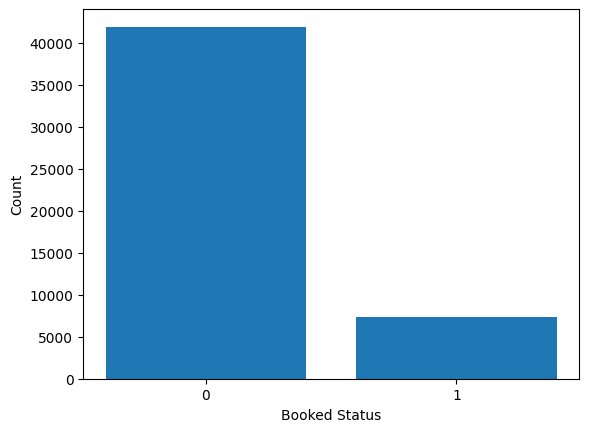

In [17]:
# cek data target

# Hitung jumlah data
status_count = df['booking_complete'].value_counts()
print('Jumlah:', status_count)

# Visualisasi perbandingan jumlah data
plt.bar(status_count.index, status_count.values)
plt.xlabel('Booked Status')

# Atur label sumbu x
plt.xticks([0, 1])

# Atur judul dan sumbu y
plt.ylabel('Count')

plt.show()

In [18]:
# cek data dengan .describe
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


# Data preprocessing

Jumlah: booking_complete
0    41890
1     7391

## Balancing data

In [19]:

# Mengurutkan DataFrame berdasarkan kolom 'booking_complete'
df = df.sort_values(by='booking_complete')

# Mengambil 7391 baris pertama dengan nilai 'booking_complete' sama dengan 0
booking_complete0 = df[df["booking_complete"] == 0].head(7391)

# Mengambil 7391 baris pertama dengan nilai 'booking_complete' sama dengan 1
booking_complete1 = df[df["booking_complete"] == 1].head(7391)

# Menggabungkan kedua DataFrame
df = pd.concat([booking_complete0, booking_complete1])

# Mereset indeks DataFrame
df = df.reset_index(drop=True)

# Menghitung jumlah data dengan nilai 'booking_complete'
booking_complete_balance = df['booking_complete'].value_counts()
print('Jumlah:', booking_complete_balance)


Jumlah: booking_complete
0    7391
1    7391
Name: count, dtype: int64


## Feature selection

Berdasarkan analisis pada EDA kita akan menggunakan fitur-fitur berikut:

'flight_duration', 'length_of_stay', 'sales_channel',
 'trip_type',
 'flight_day',
 'route',
 'booking_origin',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals'


## Memisihkan antara fitur X dan target y

In [20]:
# splitting X dan y
X = df[['flight_duration', 'length_of_stay', 'sales_channel',
 'trip_type',
 'flight_day',
 'route',
 'booking_origin',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals']]
y = df['booking_complete']

## Memisahkan antara train dan test

In [21]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print(X_train.shape)
print(X_test.shape)

(11825, 10)
(2957, 10)


## Handling outliers

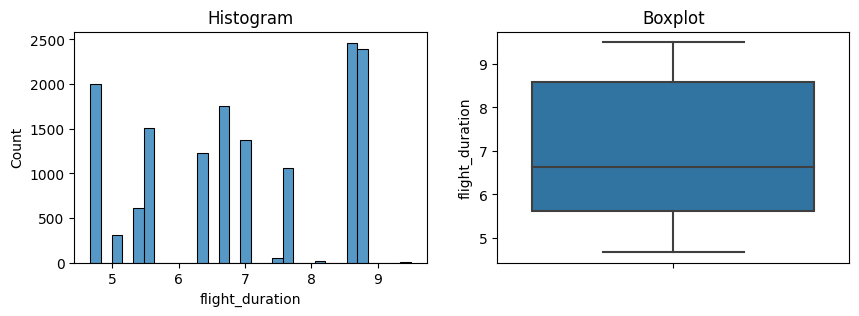

Skewness: -0.08607756838760337
The distribution is normal


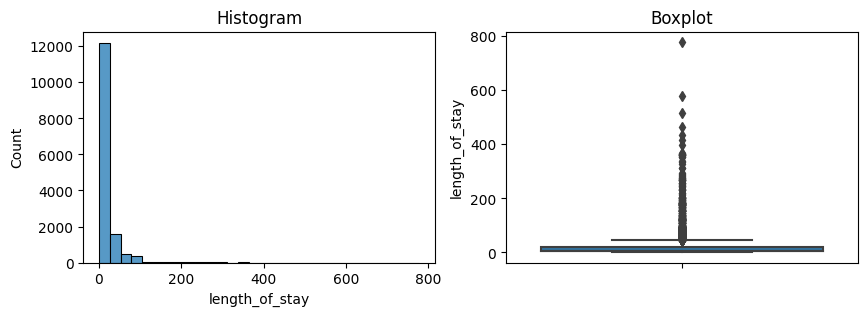

Skewness: 6.780519512692246
The distribution is skewed


In [22]:
# Cek visualisasi dengan histogram dan boxplot

numeric_columns = ['flight_duration', 'length_of_stay']

# Cek distribusi data dan outliers
def check_distribution_outliers(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[column])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[column].skew())
        if (df[column].skew() <= -0.5) or (df[column].skew() >= 0.5):
            print('The distribution is skewed')
        else:
            print('The distribution is normal')

check_distribution_outliers(df[numeric_columns], numeric_columns)

In [23]:
# Fungsi untuk penanganan outlier dengan IQR winsorization
def iqr_winsorize_column(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    winsorized = df[column].clip(lower_bound, upper_bound)
    df[column] = winsorized
    return df

# Penanganan outlier dengan IQR winsorization
for feature in numeric_columns:
    df = iqr_winsorize_column(df, feature)

## Feature scaling & encoding

In [24]:
numerical_columns = ['flight_duration', 'length_of_stay']
categorical_columns = ['sales_channel',
 'trip_type',
 'flight_day',
 'route',
 'booking_origin',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals']
#ordinal_columns = ['']

# Preprocessing pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
#ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns),
        #('ord', ordinal_transformer, ordinal_columns)
    ])

In [25]:
# logreg pipeline
model_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=20))
])


# svm pipeline
model_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC (random_state=20))
])


# dt pipeline
model_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=20))
])


# random forest pipeline
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=20))
])

# KNN pipeline
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Model

## Logistic regression

In [26]:
# model training

model_logreg.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['flight_duration',
                                                   'length_of_stay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sales_channel', 'trip_type',
                                                   'flight_day', 'route',
                                                   'booking_origin',
                                                   'wants_extra_baggage',
                                                   'wants_preferred_seat',
                                                   'wants_in_flight_meals'])])),
                ('classifier', LogisticRegression(random_state=20))])

In [27]:
# model predict

y_pred_train_logreg = model_logreg.predict(X_train)
y_pred_test_logreg = model_logreg.predict(X_test)
y_pred_train_logreg

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [28]:
# confusion matrix train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_logreg))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_logreg))

Hasil prediksi train-set
[[4428 1461]
 [1175 4761]]

 Hasil prediksi test-set
[[1095  407]
 [ 327 1128]]


In [29]:
# classification report train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_logreg))

# Classification report test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_logreg))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      5889
           1       0.77      0.80      0.78      5936

    accuracy                           0.78     11825
   macro avg       0.78      0.78      0.78     11825
weighted avg       0.78      0.78      0.78     11825


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1502
           1       0.73      0.78      0.75      1455

    accuracy                           0.75      2957
   macro avg       0.75      0.75      0.75      2957
weighted avg       0.75      0.75      0.75      2957



## SVM

In [30]:
# model training
model_svm.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['flight_duration',
                                                   'length_of_stay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sales_channel', 'trip_type',
                                                   'flight_day', 'route',
                                                   'booking_origin',
                                                   'wants_extra_baggage',
                                                   'wants_preferred_seat',
                                                   'wants_in_flight_meals'])])),
                ('classifier', SVC(random_state=20))])

In [31]:
# model predict
y_pred_train_svm = model_svm.predict(X_train)
y_pred_test_svm = model_svm.predict(X_test)

In [32]:
# confusion matrix train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_svm))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_svm))

Hasil prediksi train-set
[[4539 1350]
 [1006 4930]]

 Hasil prediksi test-set
[[1116  386]
 [ 282 1173]]


In [33]:
# classification report train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_svm))

# classification report test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_svm))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      5889
           1       0.79      0.83      0.81      5936

    accuracy                           0.80     11825
   macro avg       0.80      0.80      0.80     11825
weighted avg       0.80      0.80      0.80     11825


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1502
           1       0.75      0.81      0.78      1455

    accuracy                           0.77      2957
   macro avg       0.78      0.77      0.77      2957
weighted avg       0.78      0.77      0.77      2957



## Decesion tree

In [34]:
# model training
model_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['flight_duration',
                                                   'length_of_stay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sales_channel', 'trip_type',
                                                   'flight_day', 'route',
                                                   'booking_origin',
                                                   'wants_extra_baggage',
                                                   'wants_preferred_seat',
                                                   'wants_in_flight_meals'])])),
                ('classifier', DecisionTreeClassifier(random_state=20))])

In [35]:
# model predict
y_pred_train_dt = model_dt.predict(X_train)
y_pred_test_dt = model_dt.predict(X_test)

In [36]:
# confusion matrix train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_dt))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_dt))

Hasil prediksi train-set
[[5864   25]
 [ 196 5740]]

 Hasil prediksi test-set
[[1290  212]
 [ 238 1217]]


In [37]:
# classification report train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_dt))

# classification report test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_dt))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5889
           1       1.00      0.97      0.98      5936

    accuracy                           0.98     11825
   macro avg       0.98      0.98      0.98     11825
weighted avg       0.98      0.98      0.98     11825


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1502
           1       0.85      0.84      0.84      1455

    accuracy                           0.85      2957
   macro avg       0.85      0.85      0.85      2957
weighted avg       0.85      0.85      0.85      2957



## Random forest

In [38]:
# model training
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['flight_duration',
                                                   'length_of_stay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sales_channel', 'trip_type',
                                                   'flight_day', 'route',
                                                   'booking_origin',
                                                   'wants_extra_baggage',
                                                   'wants_preferred_seat',
                                                   'wants_in_flight_meals'])])),
                ('classifier', RandomForestClassifier(random_state=20))])

In [39]:
# model predict
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

In [40]:
# confusion matrix train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_rf))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_rf))

Hasil prediksi train-set
[[5807   82]
 [ 139 5797]]

 Hasil prediksi test-set
[[1299  203]
 [ 243 1212]]


In [41]:
# classification report train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_rf))

# classification report test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_rf))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5889
           1       0.99      0.98      0.98      5936

    accuracy                           0.98     11825
   macro avg       0.98      0.98      0.98     11825
weighted avg       0.98      0.98      0.98     11825


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1502
           1       0.86      0.83      0.84      1455

    accuracy                           0.85      2957
   macro avg       0.85      0.85      0.85      2957
weighted avg       0.85      0.85      0.85      2957



## KNN

In [42]:
# model training
model_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['flight_duration',
                                                   'length_of_stay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sales_channel', 'trip_type',
                                                   'flight_day', 'route',
                                                   'booking_origin',
                                                   'wants_extra_baggage',
                                                   'wants_preferred_seat',
                                                   'wants_in_flight_meals'])])),
                ('classifier', KNeighborsClassifier())])

In [43]:
# model predict
y_pred_train_knn = model_knn.predict(X_train)
y_pred_test_knn = model_knn.predict(X_test)

In [44]:
# confusion matrix train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_knn))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_knn))

Hasil prediksi train-set
[[5142  747]
 [1198 4738]]

 Hasil prediksi test-set
[[1204  298]
 [ 411 1044]]


In [45]:
# classification report train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_knn))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_knn))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      5889
           1       0.86      0.80      0.83      5936

    accuracy                           0.84     11825
   macro avg       0.84      0.84      0.84     11825
weighted avg       0.84      0.84      0.84     11825


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1502
           1       0.78      0.72      0.75      1455

    accuracy                           0.76      2957
   macro avg       0.76      0.76      0.76      2957
weighted avg       0.76      0.76      0.76      2957



# Improvement

## DT

In [59]:
# definisikan parameter
param_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [10, 20],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', None],
    'classifier__splitter': ['best', 'random'],  # Algoritma pemisahan node ('best' atau 'random')
    'classifier__class_weight': [None, 'balanced'],  # Pemberian bobot kelas ('None' atau 'balanced')
    'classifier__min_weight_fraction_leaf': [0.0, 0.1],  # Minimum fraction dari total sample untuk minimum leaf
    'classifier__random_state': [42]  # Seed untuk mengulang hasil yang sama
}

In [60]:
# grid search
dt_grid = GridSearchCV(model_dt, param_dt, cv=5, scoring='accuracy', return_train_score=True)
dt_grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['flight_duration',
                                                                          'length_of_stay']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sales_channel',
                                                                          'trip_type',
                                                                          'flight_day',
                                                                          'route',
                                                                          'booking_origin',
                                                                          'wants_extra_baggage',
                                                                          'wants_preferred_seat',
                                                                          'wants_in_flight_meals'])])),
                                       ('classif...
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 5, 10, 20],
                         'classifier__max_features': ['auto', 'sqrt', 'log2',
                                                      None],
                         'classifier__min_samples_leaf': [1, 2, 4, 8],
                         'classifier__min_samples_split': [2, 5, 10, 20],
                         'classifier__min_weight_fraction_leaf': [0.0, 0.1,
                                                                  0.2],
                         'classifier__random_state': [42],
                         'classifier__splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy')

In [61]:
# model training
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['flight_duration',
                                                                          'length_of_stay']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sales_channel',
                                                                          'trip_type',
                                                                          'flight_day',
                                                                          'route',
                                                                          'booking_origin',
                                                                          'wants_extra_baggage',
                                                                          'wants_preferred_seat',
                                                                          'wants_in_flight_meals'])])),
                                       ('classif...
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 5, 10, 20],
                         'classifier__max_features': ['auto', 'sqrt', 'log2',
                                                      None],
                         'classifier__min_samples_leaf': [1, 2, 4, 8],
                         'classifier__min_samples_split': [2, 5, 10, 20],
                         'classifier__min_weight_fraction_leaf': [0.0, 0.1,
                                                                  0.2],
                         'classifier__random_state': [42],
                         'classifier__splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy')

In [62]:
# kombinasi paramter terbaik
print('best params:', dt_grid.best_params_)

# score dari kombinasi parameter terbaik
print('best score:', dt_grid.best_score_)

best params: {'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 20, 'classifier__min_weight_fraction_leaf': 0.0, 'classifier__random_state': 42, 'classifier__splitter': 'best'}
best score: 0.8547145877378437


In [63]:
# definisikan estemator terbaik dengan model
dt_best = dt_grid.best_estimator_
print(dt_best)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['flight_duration',
                                                   'length_of_stay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sales_channel', 'trip_type',
                                                   'flight_day', 'route',
                                                   'booking_origin',
                                                   'wants_extra_baggage',
                                                   'wants_preferred_seat',
                                                   'wants_in_flight_meals'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        min_samples_sp

In [64]:
# prediksi data train
y_pred_train_dt_tuning = dt_best.predict(X_train)
# prediksi data test
y_pred_test_dt_tuning = dt_best.predict(X_test)

In [65]:
# confusion matrix train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_dt_tuning))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_dt_tuning))

Hasil prediksi train-set
[[5675  214]
 [ 713 5223]]

 Hasil prediksi test-set
[[1362  140]
 [ 252 1203]]


In [66]:
# confusion matrix train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_dt_tuning))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_dt_tuning))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      5889
           1       0.96      0.88      0.92      5936

    accuracy                           0.92     11825
   macro avg       0.92      0.92      0.92     11825
weighted avg       0.92      0.92      0.92     11825


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1502
           1       0.90      0.83      0.86      1455

    accuracy                           0.87      2957
   macro avg       0.87      0.87      0.87      2957
weighted avg       0.87      0.87      0.87      2957

